In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import solver as solver             
from scipy.integrate import solve_ivp as solver_scipy

In [2]:
# define the y' funciotn
def func_damped(t,y,K,M,L):
    force = -K * y[0] - L * y[1]     # F = - k v - L v
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f

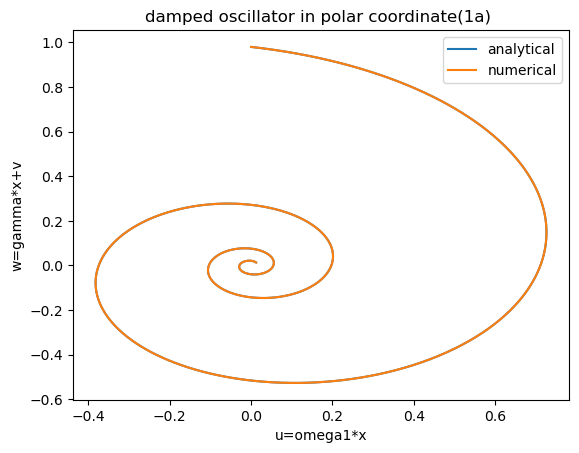

In [3]:
#第一大題a小題  
#重複利用demo3
# Prepare the input arguments
t_span = np.linspace(0,20, 2001)
t_eval = t_span
K = 1
M = 1 #omega=1rad/s
L = 0.4
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
omega  = np.sqrt(omega0**2 - gamma**2)
y = np.array([0,omega]) # initial condition (A=1，phi=pi/2，x=0,v=-omega) 
args = (K,M,L)

# use the IVP solver
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
u=omega*sol[0] #u=omega_1*x
w=gamma*sol[0]+sol[1] #w=rx+v
#解析解
phi0   = -math.pi/2
x_ana = np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))
v_ana = -gamma*np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))-omega*np.exp(-gamma*t_eval) * (np.sin(omega*t_eval + phi0))
u_ana=omega*x_ana
w_ana=gamma*x_ana+v_ana
#繪圖
plt.plot(u_ana, w_ana,label="analytical")
plt.plot(u, w, label="numerical")
plt.xlabel('u=omega1*x')
plt.ylabel('w=gamma*x+v')
plt.title('damped oscillator in polar coordinate(1a) ')
plt.legend()
plt.show()

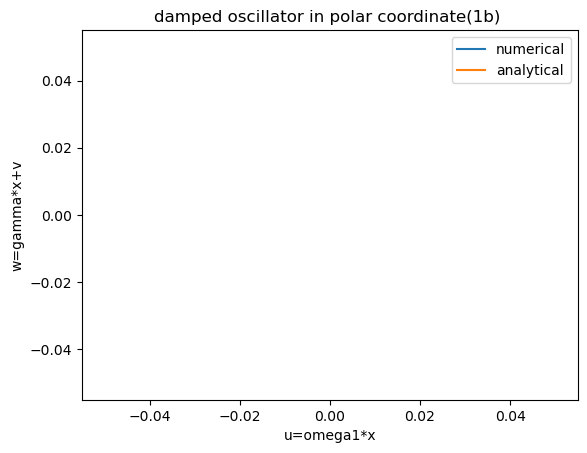

In [4]:
#第一大題b小題  
L=2 #改變L的數值，在做一次同樣的步驟
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
omega  = np.sqrt(omega0**2 - gamma**2)
y = np.array([0,omega]) # initial condition (A=1，phi=pi/2，x=0,v=-omega) 
args = (K,M,L)

# use the IVP solver
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
u=omega*sol[0] #u=omega_1*x
w=gamma*sol[0]+sol[1] #w=rx+v
#解析解
phi0   = -math.pi/2
x_ana = np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))
v_ana = -gamma*np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))-omega*np.exp(-gamma*t_eval) * (np.sin(omega*t_eval + phi0))
u_ana=omega*x_ana
w_ana=gamma*x_ana+v_ana
#繪圖
plt.plot(u, w, label="numerical")
plt.plot(u_ana, w_ana,label="analytical")
plt.xlabel('u=omega1*x')
plt.ylabel('w=gamma*x+v')
plt.title('damped oscillator in polar coordinate(1b) ')
plt.legend()
plt.show()

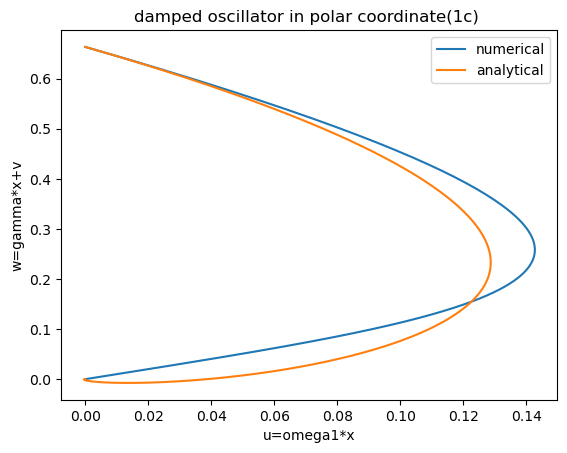

In [5]:
#第一大題c小題  
L=2.4 #改變L的數值
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
omega  = np.sqrt(gamma**2-omega0**2)
y = np.array([0,omega]) # initial condition (A=1，phi=pi/2，x=0,v=-omega) 
args = (K,M,L)

# use the IVP solver
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
u=omega*sol[0] #u=omega_1*x
w=gamma*sol[0]+sol[1] #w=rx+v
#解析解
phi0   = -math.pi/2
x_ana = np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))
v_ana = -gamma*np.exp(-gamma*t_eval) * (np.cos(omega*t_eval + phi0))-omega*np.exp(-gamma*t_eval) * (np.sin(omega*t_eval + phi0))
u_ana=omega*x_ana
w_ana=gamma*x_ana+v_ana
#繪圖
plt.plot(u, w, label="numerical")
plt.plot(u_ana, w_ana,label="analytical")
plt.xlabel('u=omega1*x')
plt.ylabel('w=gamma*x+v')
plt.title('damped oscillator in polar coordinate(1c) ')
plt.legend()
plt.show()


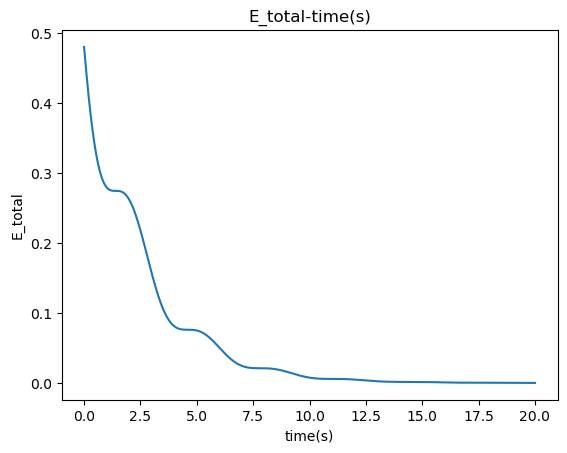

In [6]:
#第二題 E_total-time(s)圖
L=0.4 #改變L的數值
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
omega  = np.sqrt(omega0**2 - gamma**2)
y = np.array([0,omega]) # initial condition (A=1，phi=pi/2，x=0,v=-omega) 
args = (K,M,L)
sol = solver.solve_ivp(func_damped,t_span,y, "RK4", t_eval, args)
etot = 0.5*1*sol[0]**2 + 0.5*1*sol[1]**2 #E=kx^2/2+mv^2/2
plt.plot(t_eval, etot,)
plt.xlabel('time(s)')
plt.ylabel('E_total')
plt.title('E_total-time(s)')
plt.show()

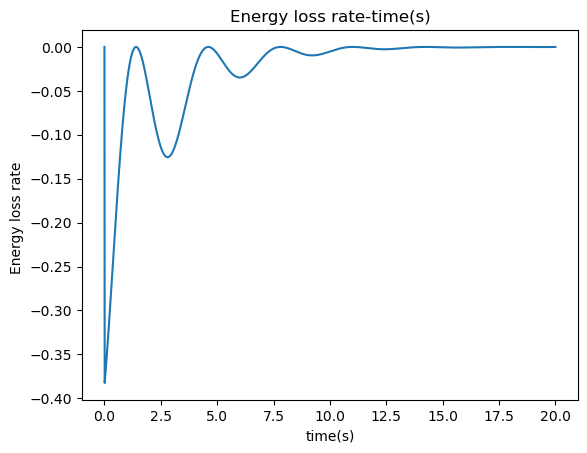

In [7]:
#第二題 E loss-time(s)圖
Eloss=np.zeros(len(t_eval))
for i in range(1,len(t_eval)):
 Eloss[i]=(etot[i]-etot[i-1])/0.01 #dx/dt 
plt.plot(t_eval, Eloss)
plt.xlabel('time(s)')
plt.ylabel('Energy loss rate ')
plt.title('Energy loss rate-time(s)')
plt.show()

In [8]:

# define the y' funciotn
def func_forced(t,y,K,M,L,F0,WF):
    force = -K * y[0] - L * y[1] + F0*np.cos(WF*t)    # F = - k v - L v + F0 sin(WF t)
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f

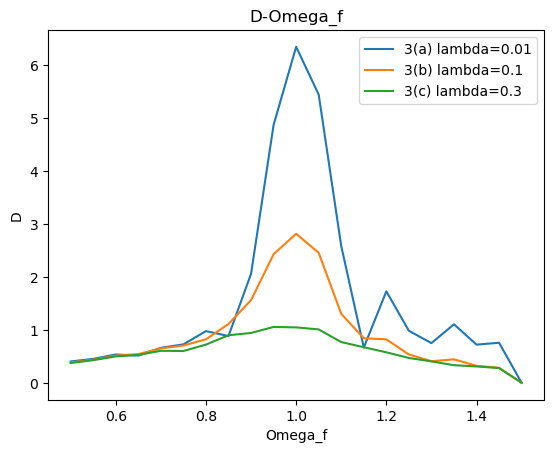

In [9]:
#3(a)
# Prepare the input arguments
t_span = np.linspace(0,50, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # 題目沒給所以我直接定(1,0)為 initial condition
K = 1
M = 1
L = 0.01
F0 =0.5
WF=np.linspace(0.5, 1.5,num=21)
args = (K,M,L,F0,WF)
Da=np.zeros(len(WF))
Db=np.zeros(len(WF))
Dc=np.zeros(len(WF))
xa_40to50=np.zeros(1000)#取40秒到50秒
xb_40to50=np.zeros(1000)
xc_40to50=np.zeros(1000)
for i in range (0,len(WF)-1): #得到不同WF時的D
 sola = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.01,F0,WF[i])) #跑不同lambda下的結果
 solb = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.1,F0,WF[i]))
 solc = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,0.3,F0,WF[i]))
 xa_40to50=abs(sola[0,4001:5001]) #40秒到50秒時x的絕對值
 Da[i]=np.mean(xa_40to50)  #取期望值
 xb_40to50=abs(solb[0,4001:5001])
 Db[i]=np.mean(xb_40to50)
 xc_40to50=abs(solc[0,4001:5001])
 Dc[i]=np.mean(xc_40to50)
#繪圖
plt.plot(WF, Da,label="3(a) lambda=0.01")
plt.plot(WF, Db,label="3(b) lambda=0.1")
plt.plot(WF, Dc,label="3(c) lambda=0.3")
plt.xlabel('Omega_f')
plt.ylabel('D')
plt.title('D-Omega_f')
plt.legend()
plt.show()


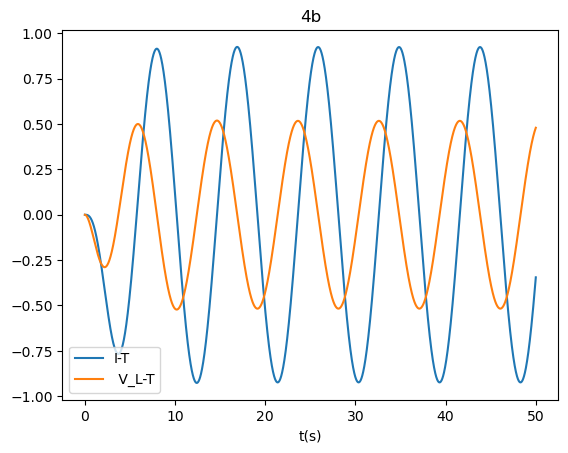

In [12]:
#第四題(b) 解髮跟第三題一樣只是將 L=m，R=lambda，1/c=k F=E 進行替換而已

t_span = np.linspace(0,50, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # 題目沒給所以我直接定(1,0)為 initial condition
C=1
K = 1/C
M = 1 #電感L=1 因為撞符號我不另外打
R=0.8
L=R
E0=1
F0=E0
WF=0.7
args = (K,M,L,F0,WF)
V_L=np.zeros(len(t_eval))
sol = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,L,F0,WF))
I=sol[1]#速度v對應到電流I
for i in range(1,len(t_eval)):
 V_L[i]=L*(I[i]-I[i-1])/0.01 #L*dI/dt 
plt.plot(t_eval,I,label="I-T")
plt.plot(t_eval, V_L,label=" V_L-T")
plt.xlabel('t(s)')
plt.title('4b')
plt.legend()
plt.show()

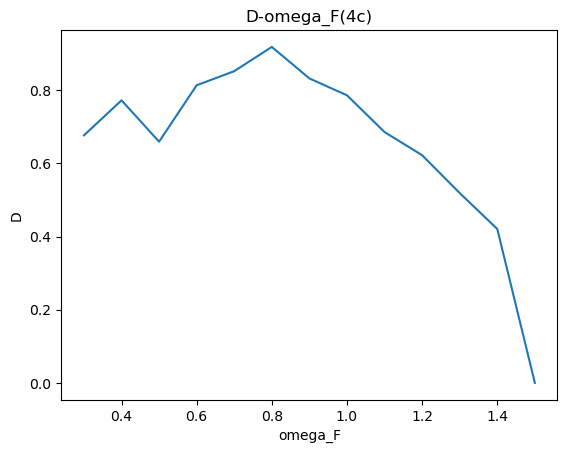

In [11]:
#第四題(c) 解髮跟第三題一樣只是將 L=m，R=lambda，1/c=k F=E 進行替換而已

t_span = np.linspace(0,50, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # 題目沒給所以我直接定(1,0)為 initial condition
C=1
K = 1/C
M = 1 #電感L=1 因為撞符號我不另外打
R=0.8
L=R
E0=1
F0=E0
WF=np.linspace(0.3, 1.5,num=13)
args = (K,M,L,F0,WF)
D=np.zeros(len(WF)) #因為題目沒寫要做什麼圖，所以我用第三題的方式寫
q_40to50=np.zeros(1000)#取40秒到50秒
for i in range (0,len(WF)-1): #得到不同WF時的D
 sol = solver.solve_ivp(func_forced,t_span,y, "RK4", t_eval, args=(K,M,L,F0,WF[i])) #跑不同WF下的結果
 q_40to50=abs(sol[0,4001:5001]) #40秒到50秒時x的絕對值
 D[i]=np.mean(q_40to50)  #取期望值
plt.plot(WF,D)
plt.xlabel('omega_F')
plt.ylabel('D')
plt.title('D-omega_F(4c)')
plt.show()
